<a href="https://www.kaggle.com/code/saugatkafley/pss3e19-forcasting-catboost-timeseriessplit?scriptVersionId=137128046" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


# Data Importing

In [2]:
submission = pd.read_csv("/kaggle/input/playground-series-s3e19/sample_submission.csv")
train      = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")
test       =pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")

In [3]:
train.info(verbose = True , show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [4]:
test.info(verbose = True , show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


# Data analysis and visualization 

_Converting datetime -> pd.to_datetime()_

In [5]:
train['date'] = pd.to_datetime( train['date'] )

train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['quarter'] = train['date'].dt.quarter
train['season'] = train.month %12 //3 +1
train['weekofyear'] = train.date.dt.isocalendar().week
train["dayofweek"] = train['date'].dt.dayofweek+1

In [6]:
test['date'] = pd.to_datetime( train['date'] )

test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['quarter'] = test['date'].dt.quarter
test['season'] = test.month %12 //3 +1
test['weekofyear'] = test.date.dt.isocalendar().week
test["dayofweek"] = test['date'].dt.dayofweek+1

In [7]:
train.head()

,id,date,country,store,product,num_sold,day,month,year,quarter,season,weekofyear,dayofweek
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,1,2017,1,1,52,7
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,1,2017,1,1,52,7
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,1,2017,1,1,52,7
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,1,2017,1,1,52,7
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,1,2017,1,1,52,7


(array([0, 1, 2]),
 [Text(0, 0, 'Kagglazon'),
  Text(1, 0, 'Kaggle Learn'),
  Text(2, 0, 'Kaggle Store')])

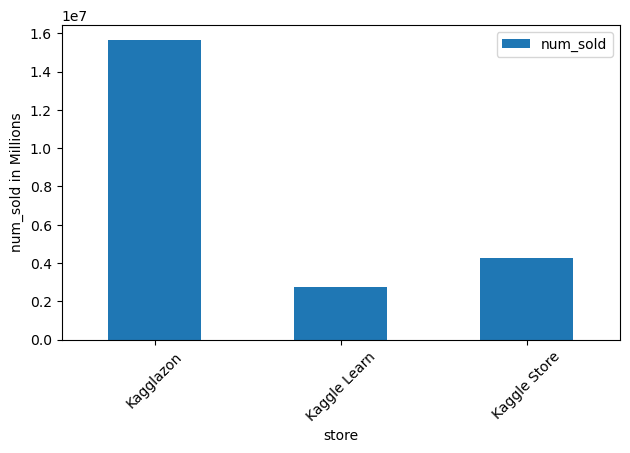

In [8]:
train.groupby('store')["num_sold"].sum().plot(kind = "bar",
                                             xlabel = "store", 
                                             ylabel = "num_sold in Millions", 
                                             legend= True,
                                             )
plt.tight_layout()
plt.xticks(rotation = 45)

<Axes: xlabel='year', ylabel='num_sold in Millions'>

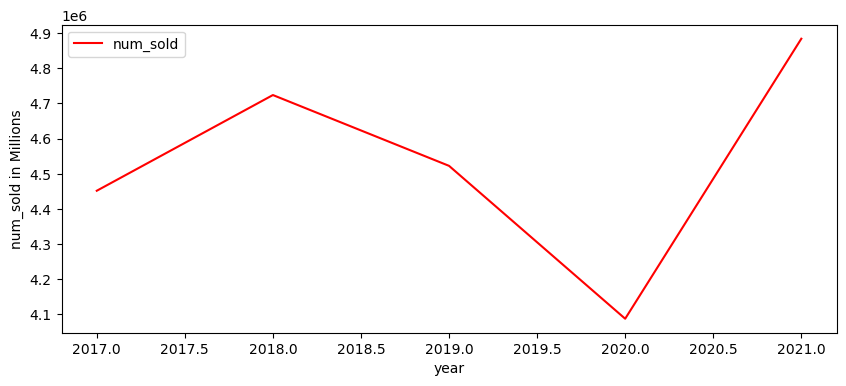

In [9]:
train.groupby('year')["num_sold"].sum().plot(kind = "line" , 
                                             figsize = (10,4), 
                                             xlabel = "year" , 
                                             ylabel = "num_sold in Millions",
                                             c = 'r',
                                             legend = True,)

<Axes: xlabel='year', ylabel='num_sold in Millions'>

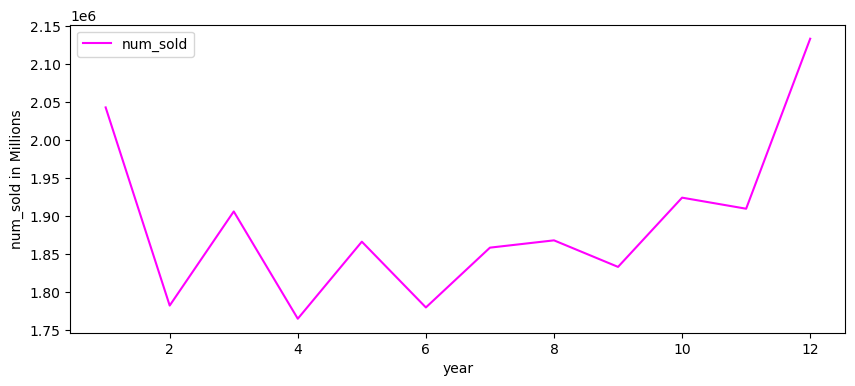

In [10]:
train.groupby('month')["num_sold"].sum().plot(kind = "line" , 
                                             figsize = (10,4), 
                                             xlabel = "year" , 
                                             ylabel = "num_sold in Millions",
                                             c = 'magenta',
                                             legend = True,
                                             )

<Axes: xlabel='year', ylabel='num_sold in Millions'>

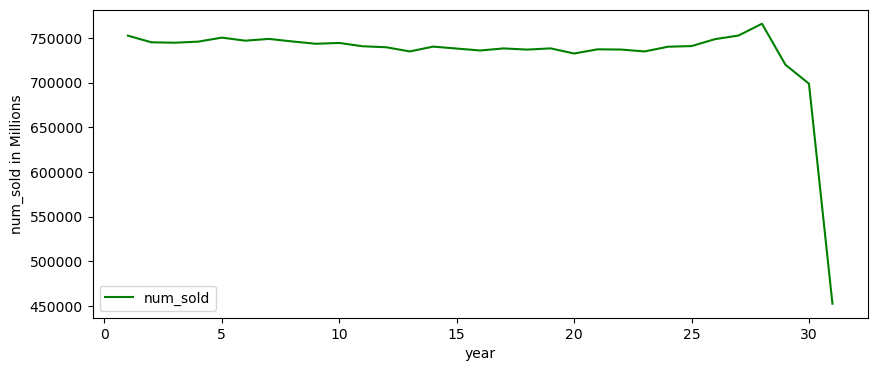

In [11]:
train.groupby('day')["num_sold"].sum().plot(kind = "line" , 
                                             figsize = (10,4), 
                                             xlabel = "year" , 
                                             ylabel = "num_sold in Millions",
                                             c = 'green',
                                             legend = True,)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2017'),
  Text(1, 0, '2018'),
  Text(2, 0, '2019'),
  Text(3, 0, '2020'),
  Text(4, 0, '2021')])

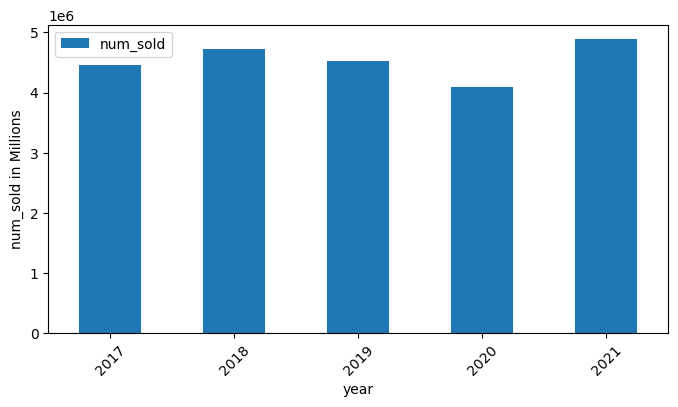

In [12]:
train.groupby('year')["num_sold"].sum().plot(kind = "bar" , 
                                             figsize = (8,4), 
                                             xlabel = "year" , 
                                             ylabel = "num_sold in Millions", 
                                             legend = True,
                                            )
plt.xticks(rotation=45)

In [13]:
train["product"].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

<Axes: xlabel='products'>

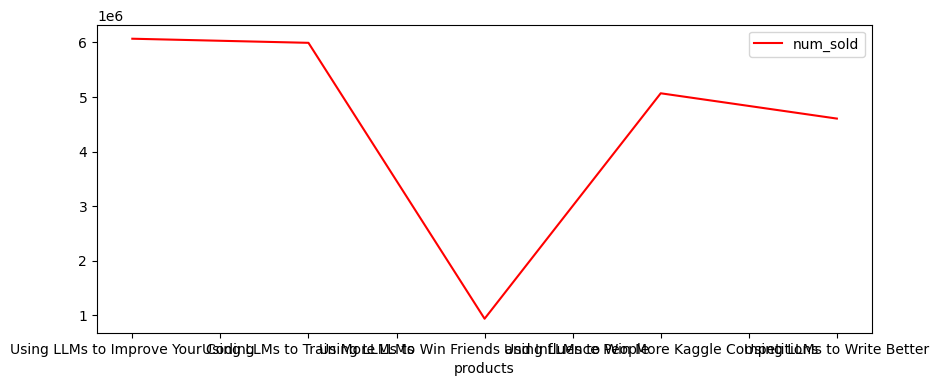

In [14]:
train.groupby('product')["num_sold"].sum().plot(kind = "line", 
                                               figsize = (10,4),
                                               c = 'r',
                                               xlabel = "products",
#                                                y_label ="num_sold ",
                                               legend = True,
                                               )

In [15]:
px.line(
    data_frame = train.groupby('product').sum(numeric_only = True),
    y = "num_sold",
)

In [16]:
px.line(
    data_frame = train.groupby('country').sum(numeric_only = True),
    y = "num_sold",
)

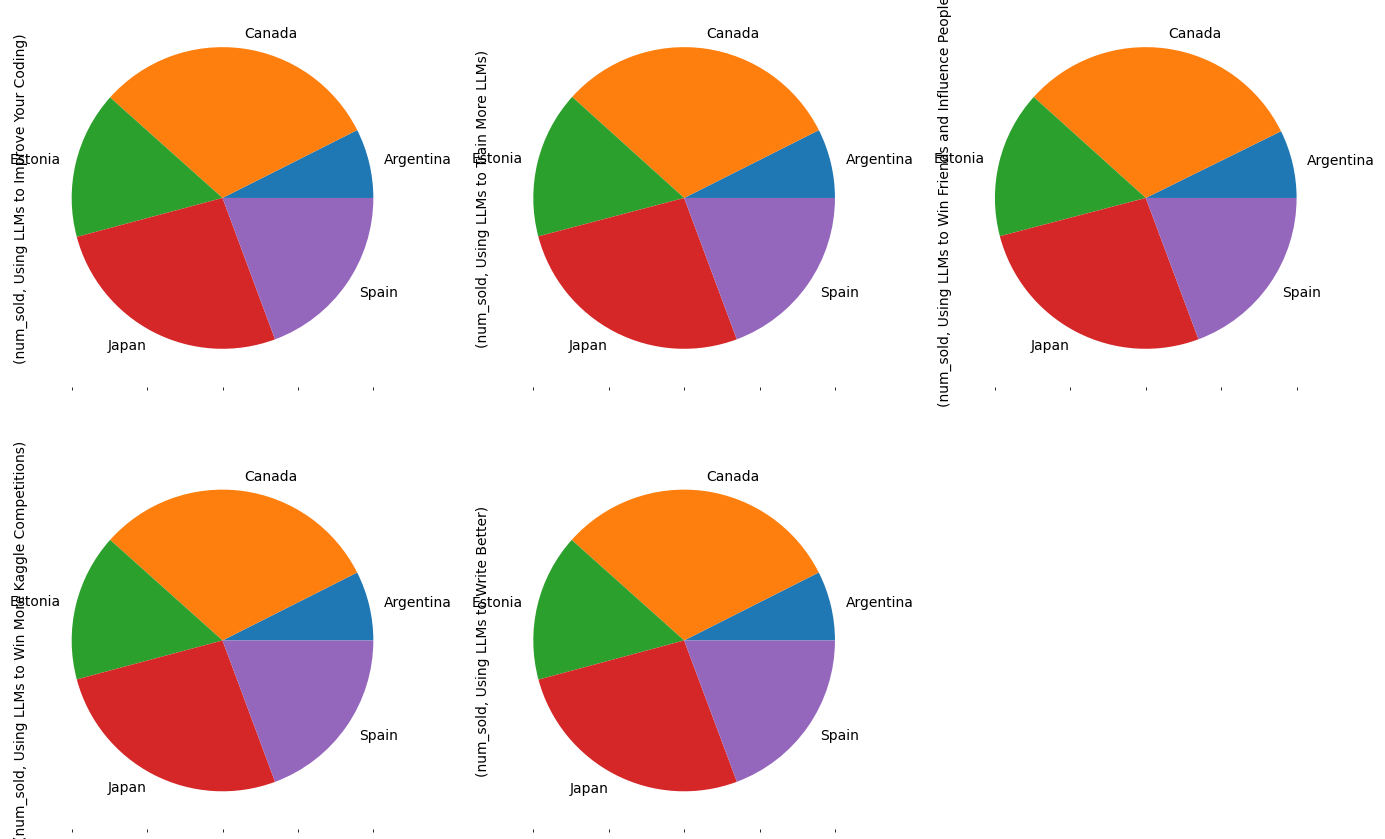

In [17]:
dfp = train.pivot_table(index='country', columns='product', values=['num_sold'], aggfunc='sum')
dfp.plot(kind='pie', subplots=True, rot=0, figsize=(14, 9), layout=(2, 3) ,  legend=False)
plt.tight_layout()

In [18]:
px.line(
    data_frame = train.groupby('dayofweek').sum(numeric_only = True),
    y = "num_sold",
)

## Trend analysis

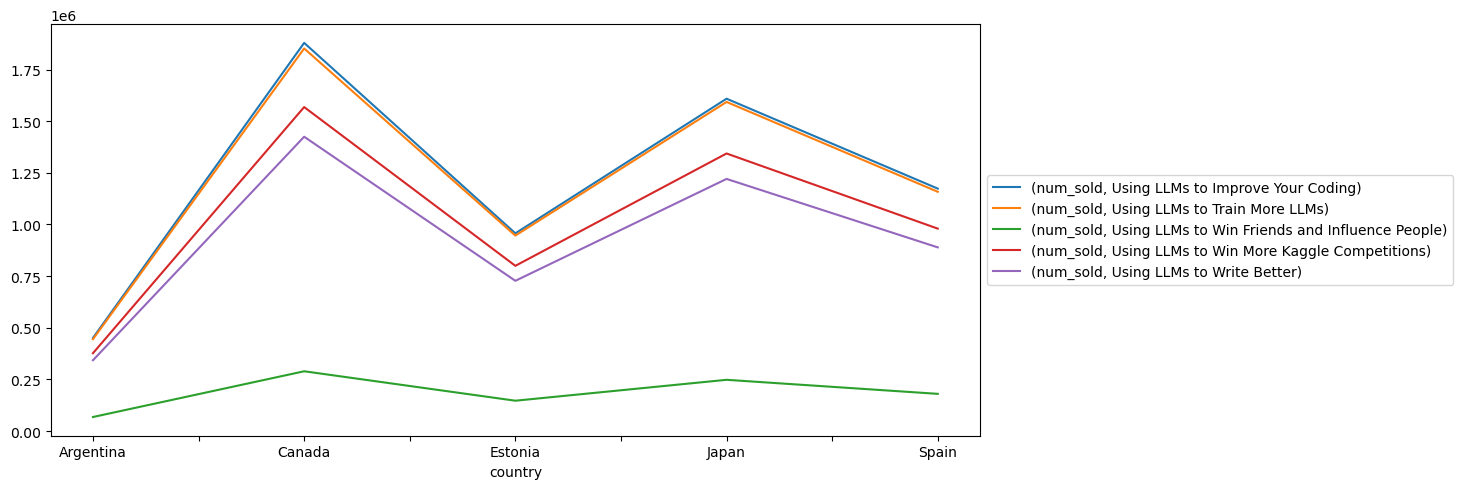

In [19]:
train.pivot_table(index='country', columns='product', values=['num_sold'], aggfunc='sum').plot( figsize = (10,5))
plt.tight_layout()
plt.legend(loc = "center left",bbox_to_anchor=(1, 0.5))

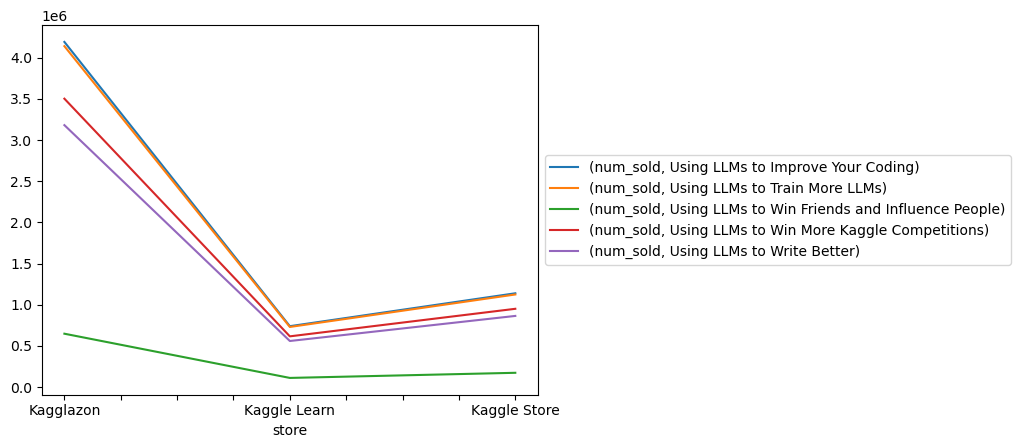

In [20]:
train.pivot_table(
    index = "store",
    columns = "product",
    values = ["num_sold"],
    aggfunc = "sum",
).plot(subplots = False)
plt.legend(loc = "center left",bbox_to_anchor=(1, 0.5))

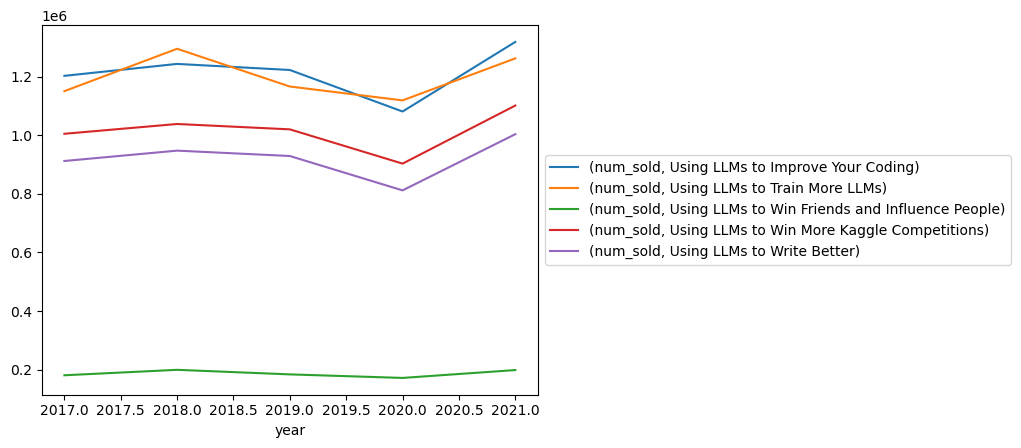

In [21]:
train.pivot_table(
    index = "year",
    columns = ["product"],
    values = ["num_sold"],
    aggfunc = "sum",
).plot(subplots = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
train.pivot_table(
    index = "year",
    columns = ["product" , "store"],
    values = ["num_sold"],
    aggfunc = "sum",
)

num_sold                            \
product Using LLMs to Improve Your Coding                             
store                           Kagglazon Kaggle Learn Kaggle Store   
year                                                                  
2017                               829797       147086       226025   
2018                               859260       151407       232988   
2019                               845555       148430       228913   
2020                               746747       131646       202706   
2021                               909723       160768       248230   

                                                                 \
product Using LLMs to Train More LLMs                             
store                       Kagglazon Kaggle Learn Kaggle Store   
year                                                              
2017                           794963       139939       215750   
2018                           893834       158255       243208   
2019                           806012       141566       218892   
2020                           772397       136411       210258   
2021                           872465       153814       236211   

                                                                     \
product Using LLMs to Win Friends and Influence People                
store                                        Kagglazon Kaggle Learn   
year                                                                  
2017                                            125390        21516   
2018                                            138327        23719   
2019                                            127577        21790   
2020                                            119149        20420   
2021                                            137600        23683   

                                                                              \
product              Using LLMs to Win More Kaggle Competitions                
store   Kaggle Store                                  Kagglazon Kaggle Learn   
year                                                                           
2017           33543                                     694578       122143   
2018           37009                                     717101       126238   
2019           34091                                     704573       124195   
2020           31826                                     624713       109403   
2021           36924                                     760875       133990   

                                                                           
product              Using LLMs to Write Better                            
store   Kaggle Store                  Kagglazon Kaggle Learn Kaggle Store  
year                                                                       
2017          188332                     629600       111140       171411  
2018          195126                     655009       115062       177420  
2019          191420                     642208       112887       174063  
2020          169064                     560895        98464       152399  
2021          206562                     692987       121962       188685

# Volume Analysis

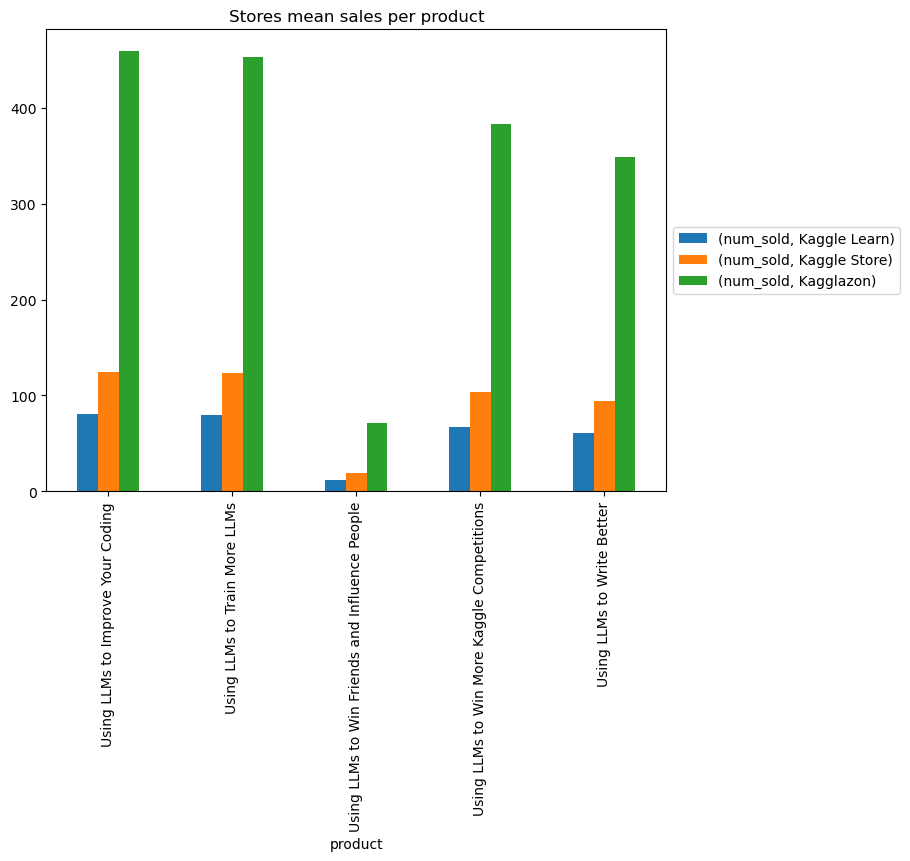

In [23]:
train.pivot_table(
    index = "product",
    columns = ["store" ,],
    values = ["num_sold"],
    aggfunc = "mean",
    sort = False,
).plot.bar(subplots = False  , 
           title = "Stores mean sales per product",
           figsize = (8,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

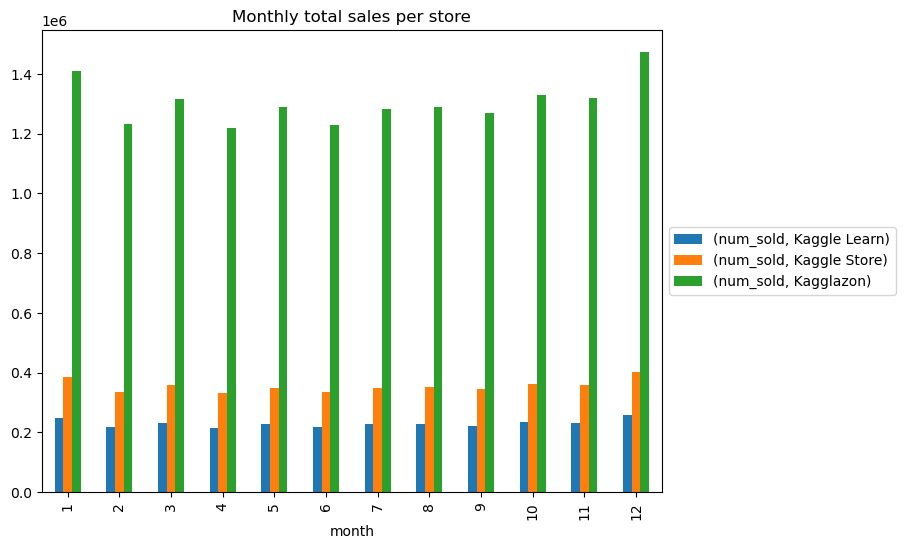

In [24]:
train.pivot_table(
    index = "month",
    columns = ["store" ,],
    values = ["num_sold"],
    aggfunc = "sum",
    sort = False,
).plot.bar(subplots = False , 
           title = "Monthly total sales per store",
           figsize = (8,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

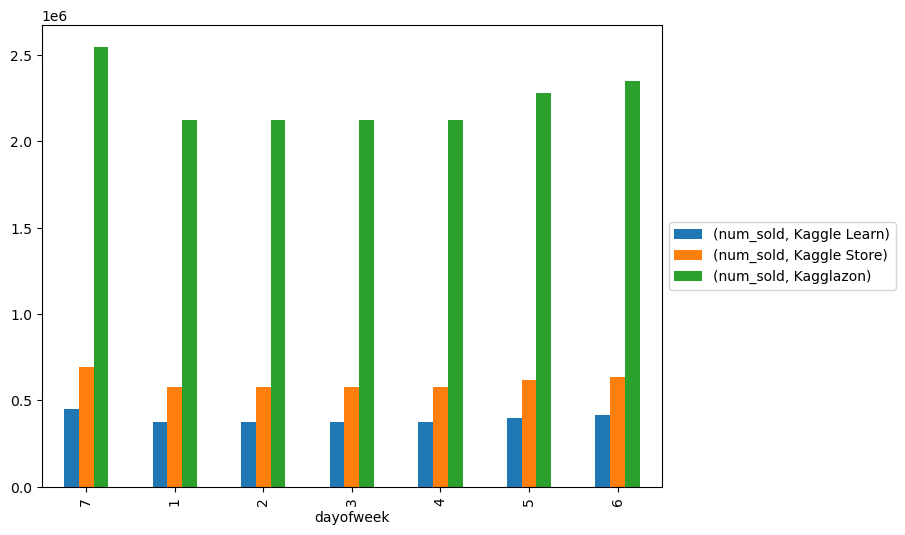

In [25]:
train.pivot_table(
    index = "dayofweek",
    columns = ["store" ,],
    values = ["num_sold"],
    aggfunc = "sum",
    sort = False,
).plot.bar(subplots = False , figsize = (8,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Decomposition

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



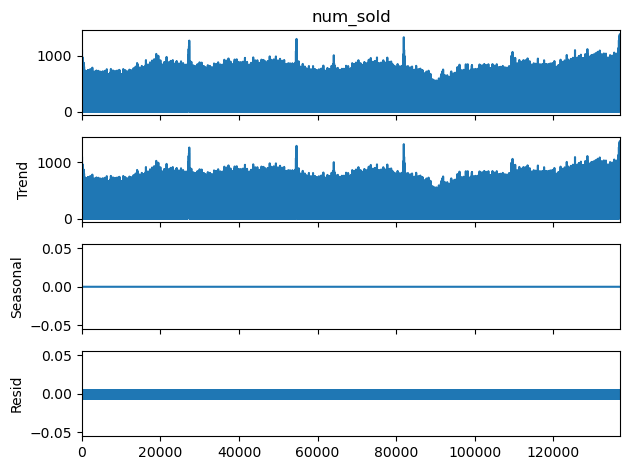

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(
    train["num_sold"],
    model = "additive",
    period=1,
    two_sided=False,
    extrapolate_trend = 'freq'
#     extrapolate_trend='freq'
)
decomp.plot()
plt.show()

# Holiday Analysis

In [27]:
# train["test"] = train.apply(lambda x: x['dayofweek'] +1 , axis=1)
train.head()

,id,date,country,store,product,num_sold,day,month,year,quarter,season,weekofyear,dayofweek
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,1,2017,1,1,52,7
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,1,2017,1,1,52,7
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,1,2017,1,1,52,7
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,1,2017,1,1,52,7
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,1,2017,1,1,52,7


In [28]:
# %%time
# from datetime import date
# import holidays
# from holidays import country_holidays

# # holidays = country_holidays(country = train.loc[0,'country']).get()
# train['is_holiday'] = train.apply(lambda x: country_holidays(x['country']).get( x['date'] ) , axis=1 )

In [29]:
# train.is_holiday

In [30]:
# Argentina holiday analysis
train.country.unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [31]:
# analysis_ar = train[ (train['country'] == "Argentina") & (train['is_holiday'].notnull()) ].groupby( ["year" , "is_holiday"]).sum() ["num_sold"]
# px.bar(data_frame = analysis_ar)

In [32]:
# analysis_ar = train[ (train['country'] == "Argentina") & (train['is_holiday'].notnull()) ].pivot_table(
#     index = "year",
#     values = "num_sold",
#     columns = "store" ,
#     aggfunc = "sum",
# )
# analysis_ar.plot(subplots=True)
# px.line(
#     data_frame = analysis_ar,
    
# )
# px.bar(
#     data_frame = analysis_ar,
# )

In [33]:
# analysis_ar = train[ (train['country'] == "Argentina") & (train['is_holiday'].notnull()) ].pivot_table(
#     index = "product",
#     values = "num_sold",
#     columns = "store" ,
#     aggfunc = "sum",
# )
# # analysis_ar.head()
# analysis_ar.plot(kind = "kde",subplots=True, stacked= True , )
# px.bar(
#     data_frame = analysis_ar,
    
# )

In [34]:

# analysis_ar

# Data Preporcessing

In [35]:
# train.date.shift(1)

## Sampling of Data:


<Figure size 3200x1600 with 0 Axes>

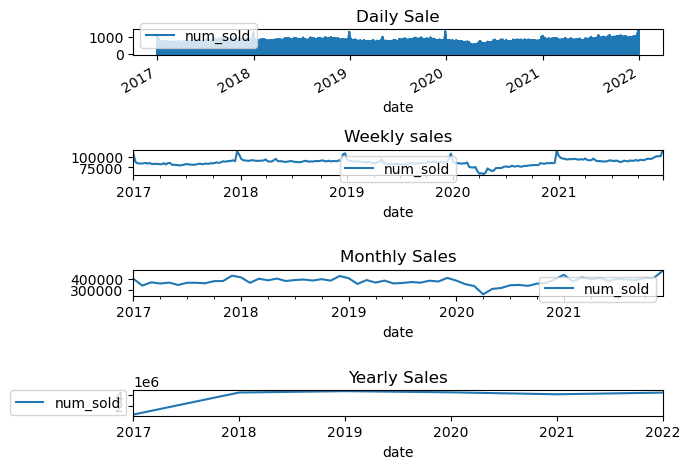

In [36]:
plt.figure(figsize = (32,16))
fig ,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex = False)

train[["date" , "num_sold"]].reset_index(False).plot(
    x = "date",
    y = "num_sold",
    ax = ax1,
    title = "Daily Sale"
)
plt.legend(loc = "center right",bbox_to_anchor=(0, 0.5))
train[["date" , "num_sold"]].resample("7D" , on="date").sum(numeric_only=True).reset_index(False).plot(
     x = "date",
    y = "num_sold",
    ax = ax2,
    title = "Weekly sales"
)
plt.legend(loc = "center right",bbox_to_anchor=(0, 0.5))

train[["date" , "num_sold"]].resample("M" , on="date").sum(numeric_only=True).reset_index(False).plot(
     x = "date",
    y = "num_sold",
    ax = ax3, 
    title = "Monthly Sales"
)
plt.legend(loc = "center right",bbox_to_anchor=(0, 0.5))
train[["date" , "num_sold"]].resample("12M" , on="date").sum(numeric_only=True).reset_index(False).plot(
     x = "date",
    y = "num_sold",
    ax = ax4,
    title = "Yearly Sales"
)

plt.tight_layout()
plt.legend(loc = "center right",bbox_to_anchor=(0, 0.5))

## Downsampling
Downsampling the data to `Weekly`

In [37]:
train.columns.to_list()

['id',
 'date',
 'country',
 'store',
 'product',
 'num_sold',
 'day',
 'month',
 'year',
 'quarter',
 'season',
 'weekofyear',
 'dayofweek']

In [38]:
# downsampled = train[[
#     "id",
#     'date',
#      'country',
#      'store',
#      'product',
#      'day',
#      'month',
#      'year',
#      'dayofweek',
#      'num_sold',
# ]].resample("7D" , on = "date").mean(numeric_only=False).reset_index(False)

# downsampled["num_sold"] = train[["date" , "num_sold"]].resample('7D' , on = "date").sum()[['num_sold']]

In [39]:
# downsampled.head()

In [40]:
cols = train.columns.to_list()
removed = cols.pop(cols.index("num_sold"))
cols.append(removed)
cols

['id',
 'date',
 'country',
 'store',
 'product',
 'day',
 'month',
 'year',
 'quarter',
 'season',
 'weekofyear',
 'dayofweek',
 'num_sold']

In [41]:
train = train[cols]
train.head()

,id,date,country,store,product,day,month,year,quarter,season,weekofyear,dayofweek,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,1,2017,1,1,52,7,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,1,1,2017,1,1,52,7,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,1,2017,1,1,52,7,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,1,2017,1,1,52,7,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,1,1,2017,1,1,52,7,49


In [42]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size = 0.1, random_state=42)

In [45]:
%%time
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer

# SMAPE metriği
def smape(y_true, y_pred):
    return 1 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)) * 100)

smape_scorer = make_scorer(smape, greater_is_better=False)

# TimeSeriesSplit ile cross-validation
tscv = TimeSeriesSplit(n_splits=5)
scores = []
test_preds = np.zeros(len(test))

for fold,(train_index, test_index) in enumerate(tscv.split(X_train,y_train)):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]
    print("="*20)
    # CatBoost model
    model = CatBoostRegressor(
    metric_period=200,
    cat_features=["country", "store", "product"],
    iterations = 2500,
    ).fit(X_tr,y_tr)

    # Predict
    y_pred = model.predict(X_te)

    # SMAPE 
    score = smape(y_te, y_pred)
    scores.append(score)
    print(f"Fold {fold+1}: SMAPE = {score}")
    test_preds+=model.predict(test)

# Mean SMAPE 
mean_score = np.mean(scores)
print("Mean SMAPE =", mean_score)
# model = CatBoostRegressor(
#     metric_period=200,
#     cat_features=["country", "store", "product"],
#     iterations = 2000,
# ).fit(X_train, y_train)

Learning rate set to 0.037571
0:	learn: 178.5063275	total: 64.4ms	remaining: 2m 8s
200:	learn: 28.8674667	total: 1.75s	remaining: 15.7s
400:	learn: 23.2619731	total: 3.49s	remaining: 13.9s
600:	learn: 20.5818811	total: 5.15s	remaining: 12s
800:	learn: 19.0253074	total: 6.86s	remaining: 10.3s
1000:	learn: 17.8879373	total: 8.63s	remaining: 8.61s
1200:	learn: 16.9937088	total: 10.5s	remaining: 6.97s
1400:	learn: 16.3276458	total: 12.4s	remaining: 5.31s
1600:	learn: 15.8239113	total: 14.3s	remaining: 3.56s
1800:	learn: 15.3678166	total: 16.3s	remaining: 1.8s
1999:	learn: 15.0380612	total: 18.2s	remaining: 0us
Fold 1: SMAPE = 6.700551659352038
Learning rate set to 0.041919
0:	learn: 177.2110288	total: 20.8ms	remaining: 41.5s
200:	learn: 25.1904297	total: 3.16s	remaining: 28.3s
400:	learn: 21.5146031	total: 6.16s	remaining: 24.6s
600:	learn: 18.9936196	total: 9.39s	remaining: 21.9s
800:	learn: 17.4024952	total: 12.7s	remaining: 19s
1000:	learn: 16.5910924	total: 16s	remaining: 16s
1200:	lea

In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error

# pred = model.predict(X_val)
# mean_absolute_error(y_val ,pred )

In [ ]:
# mean_squared_error(y_val ,pred)

In [49]:
submission["num_sold"] = test_preds/3
submission.to_csv("/kaggle/working/submission.csv", index=False)